### Student Information
Name: 黃為翰 

Student ID: 113065508

GitHub ID:  hhhwei23

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

### Loading Dataset

In [2]:
import pandas as pd
categories = ['not nostalgia', 'nostalgia']

dataSet = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

print(dataSet.head()) # print top 5 lines

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


### Check data information

Try to isolate the target and data text for possibly furthur usage

In [3]:
target = dataSet['sentiment'].tolist()
target_df = pd.DataFrame(target, columns=['sentiment'])
data = dataSet['comment'].tolist()
data_df = pd.DataFrame(data, columns=['comment'])

print("Target: ", target)
print("Data: ", data[0:2])

Target:  ['not nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'nostalgia', 'not nostalgia', 'not nostalgia', 'not nostalgia',

In [4]:
for text in data[0:3]:
    print(text)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


In [5]:
import helpers.data_mining_helpers as dmh

for t in dataSet["comment"][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


To have easier access of sentiment, I add another column to represent 
* 0--> not nostalgia
* 1--> nostalgia

In [6]:
import pandas as pd

dataSet['sent_num'] = dataSet['sentiment'].apply(lambda x: 1 if x == 'nostalgia' else 0)

In [7]:
dataSet[0:10]

,sentiment,comment,sent_num
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1
5,nostalgia,"Every time I heard this song as a child, I use...",1
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1
8,not nostalgia,Wherever you are you always in my heart,0
9,not nostalgia,Elvis will always be number one no one can com...,0


In [8]:
# Sampling
sampled = dataSet.sample(n = 10)
print(sampled)

          sentiment                                            comment  \
1300      nostalgia  so many happy memories of my beautiful mum lis...   
556       nostalgia  Loved this song since I was 3! My grandparents...   
169   not nostalgia  do not create music like this anymore and peop...   
1143  not nostalgia  no body with a sweeter melodious  voice than h...   
507       nostalgia  I like this song very much, when I was in the ...   
1412      nostalgia  Reminds me of being a little girl, listening t...   
1252  not nostalgia  That's what I call a thing deserver of being c...   
734   not nostalgia  A promise we are waiting for to receive the re...   
319       nostalgia  Old is gold. As we grew old this song gives me...   
1414  not nostalgia  This man had more natural talent then all of t...   

      sent_num  
1300         1  
556          1  
169          0  
1143         0  
507          1  
1412         1  
1252         0  
734          0  
319          1  
1414         0 

### Data Mining Section (Pandas)

In [9]:
# check null
dataSet.isnull()

,sentiment,comment,sent_num
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [10]:
dataSet.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sent_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [11]:
sum(dataSet.duplicated())

1

there is one duplicated data, now I need to eliminate that data

(Keep the first appeared data, delete the second one)

In [12]:
dataSet.drop_duplicates(keep='first', inplace=True)

In [13]:
len(dataSet)

1499

### Data Preprocessing
Using matplotlob to visualization

In [14]:
import matplotlib.pyplot as plt

categories

['not nostalgia', 'nostalgia']

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Category Distribution'}, xlabel='sentiment'>

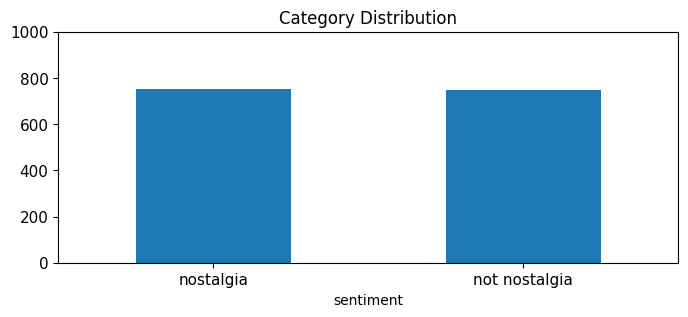

In [15]:
print(dataSet['sentiment'].value_counts())

dataSet['sentiment'].value_counts().plot(kind='bar',
                              title='Category Distribution',
                              ylim=[0, 1000],
                              rot = 0, fontsize=11, figsize=(8, 3))

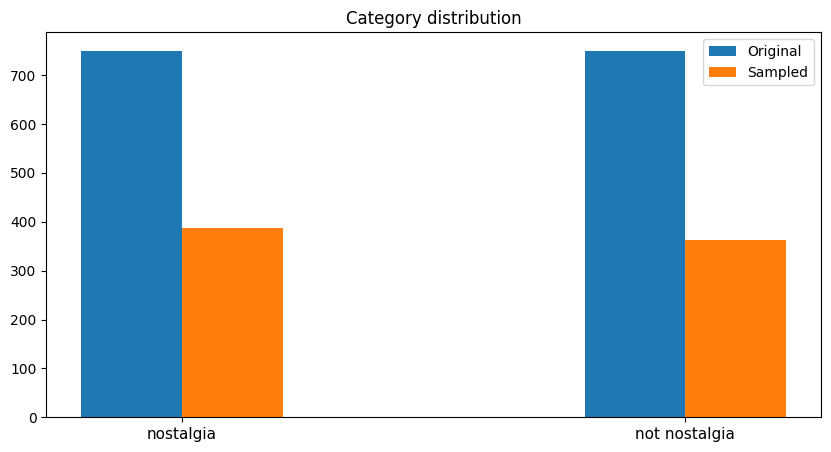

In [16]:
import numpy as np
X_sampled = dataSet.sample(n = 750)

X_counts = dataSet['sentiment'].value_counts()
X_sample_counts = X_sampled['sentiment'].value_counts()

bar_width = 0.2

index = np.arange(len(X_counts))

fig, ax = plt.subplots(figsize = (10, 5))

bar1 = ax.bar(index, X_counts, bar_width, label = 'Original')
bar2 = ax.bar(index + bar_width, X_sample_counts, bar_width, label = 'Sampled')

ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(X_counts.index, rotation = 0, fontsize = 11)
ax.set_title("Category distribution")

ax.set_ylim = [0, max(X_counts.value_counts() + 50)]

ax.legend()

plt.show()


### Feature creation

In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Use unigram to seperate comment words

In [18]:
X = dataSet
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

X[0:5]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
Name: unigrams, dtype: object

In [19]:
X[0:5]

,sentiment,comment,sent_num,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m..."


### Feature Selection

Generate a matrix of original dataset

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer()
X_vec = count_vec.fit_transform(X["comment"])
print(X_vec[0:2])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 66 stored elements and shape (2, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  :	:
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1
  (1, 3570)	1
  (1, 3534)	2
  (1, 2028)	1
  (1, 3336)	1
  (1, 3284)	2
  (1, 1651)	1
  (1, 2341)	1
  (1, 258)	1
  (1, 3124)	1
  (1, 2186)	1
  (1, 410)	1
  (1, 1177)	1
  (1, 1983)	1
  (1, 1646)	1
  (1, 3610)	1
  (1, 1876)	1
  (1, 2976)	1
  (1, 2287)	1
  (1, 1358)	1
  (1, 256)	1
  (1, 259)	1


In [21]:
count_vec.get_feature_names_out()[1598]

'he'

In [22]:
analyze = count_vec.build_analyzer()

analyze(X["comment"][0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [23]:
X_vec.shape

(1499, 3730)

In [24]:
X_vec[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [25]:
count_vec.get_feature_names_out()[0]

'00'

This result is same as result in Master

Now, I do the visualization for furthur usage

In [26]:
# get only head(20)
plot_x = ["term_"+str(i) for i in count_vec.get_feature_names_out()[0:20]]

plot_x

['term_00',
 'term_000',
 'term_045',
 'term_07',
 'term_10',
 'term_100',
 'term_10m',
 'term_11',
 'term_11th',
 'term_12',
 'term_13',
 'term_14',
 'term_15',
 'term_150',
 'term_16',
 'term_16years',
 'term_17',
 'term_17th',
 'term_18',
 'term_19']

In [27]:
# top 20 documents
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [28]:
plot_z = X_vec[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

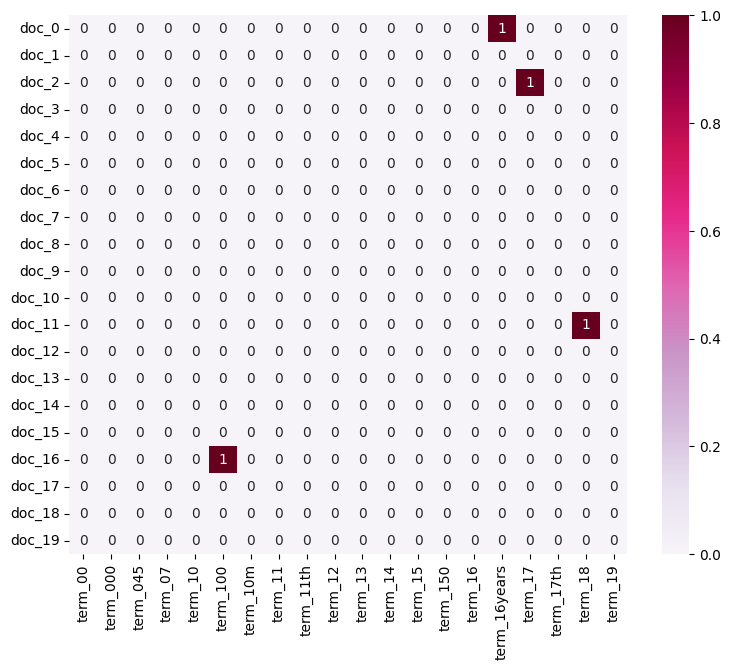

In [29]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Attribute Transformation and Aggregation

In [30]:
term_frequencies = []
for j in range(0,X_vec.shape[1]):
    term_frequencies.append(sum(X_vec[:,j].toarray()))

print(X_vec)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 31249 stored elements and shape (1499, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  :	:
  (1498, 2254)	2
  (1498, 1798)	1
  (1498, 3704)	2
  (1498, 1923)	1
  (1498, 3300)	3
  (1498, 3044)	2
  (1498, 1026)	1
  (1498, 2699)	1
  (1498, 3504)	1
  (1498, 1308)	1
  (1498, 208)	2
  (1498, 516)	1
  (1498, 637)	1
  (1498, 78)	1
  (1498, 1132)	1
  (1498, 863)	1
  (1498, 603)	2
  (1498, 3637)	1
  (1498, 1049)	1
  (1498, 87)	1
  (1498, 2027)	1
  (1498, 2089)	1
  (1498, 998)	1
  (1498, 3414)	1
  (1498, 2779)	1


In [31]:
term_frequencies = np.asarray(X_vec.sum(axis=0))[0]

term_frequencies[0]

np.int64(1)

C:\Users\hans\AppData\Local\Temp\ipykernel_28332\931169660.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vec.get_feature_names_out()[:300], rotation = 90);


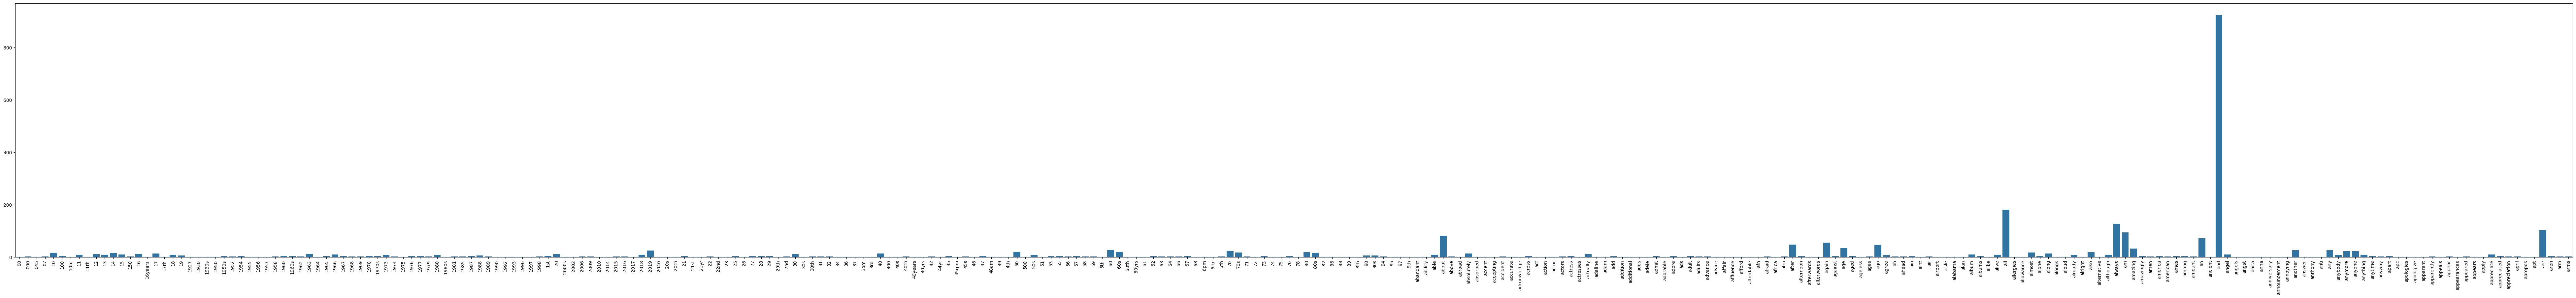

In [32]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vec.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vec.get_feature_names_out()[:300], rotation = 90);

I use freq>100 to find the words with higher frequency of usage

In [33]:
import pandas as pd
import plotly.express as px

term_frequencies = np.asarray(X_vec.sum(axis=0))[0]

data = {
    'Terms':count_vec.get_feature_names_out(),
    'Freq':term_frequencies
}

df = pd.DataFrame(data)

df_filtered = df[df['Freq'] > 100]

fig = px.bar(df_filtered,
             x='Terms',
             y='Freq',
             title='Bar Chart plotly')

fig.show()

Show the top 50 terms and sorted to have better information

In [34]:
# Answer here

df_sorted = df.sort_values(by='Freq', ascending=False)

top = df_sorted.head(50)

fig = px.bar(top,
             x='Terms',
             y='Freq',
             title='Bar Chart plotly')

fig.show()


Add log to see whether there is significant difference

C:\Users\hans\AppData\Local\Temp\ipykernel_28332\863861590.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



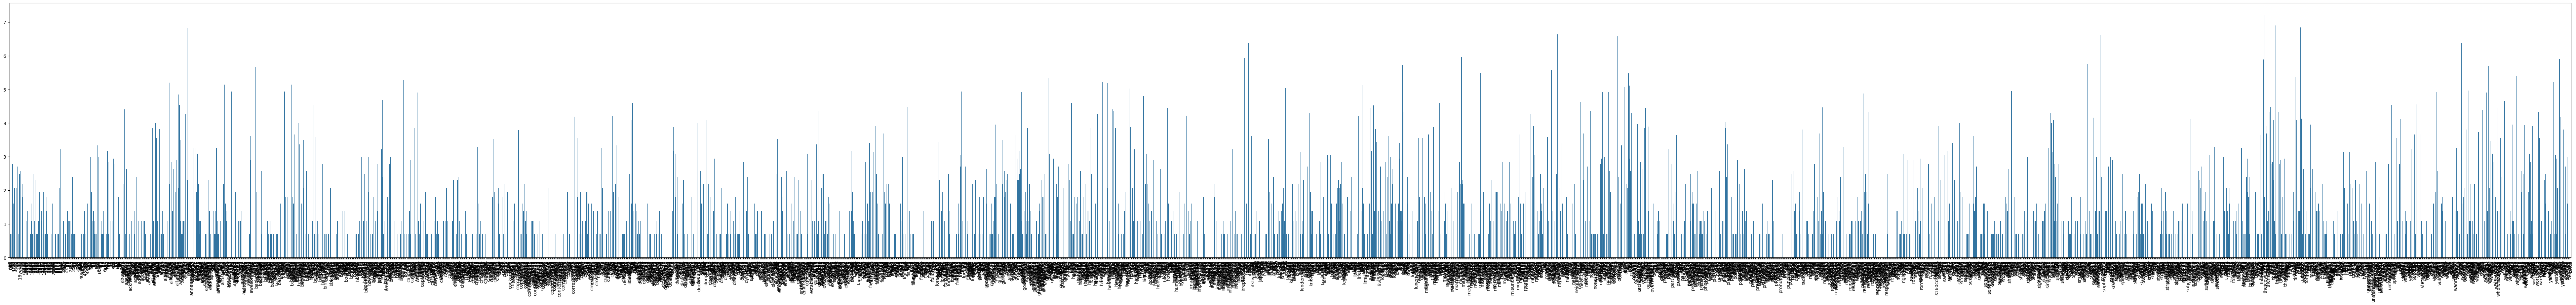

In [35]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vec.get_feature_names_out(),
                y=term_frequencies_log)
g.set_xticklabels(count_vec.get_feature_names_out(), rotation = 90);

Figure after sorting the log(frequency)

In [36]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

data = {
    'Terms':count_vec.get_feature_names_out(),
    'Freq':term_frequencies_log
}

df = pd.DataFrame(data)
df_top = df.head(300)

df_top = df_top.sort_values(by='Freq', ascending=False)

fig = px.bar(df_top,
             x='Terms',
             y='Freq',
             title='Bar Chart plotly')

fig.show()


The distribution become stair like, and the difference become smaller.

### Finding Frequent Patterns

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = X['sentiment'].unique()
category_dfs = {} # --> to store Dataframes for each category

for category in categories:
    category_dfs[category] = X[X['sentiment'] == category].copy()

print(len(category_dfs))

category_dfs

2


{'not nostalgia':           sentiment                                            comment  \
 0     not nostalgia  He was a singer with a golden voice that I lov...   
 3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
 8     not nostalgia           Wherever you  are you always in my heart   
 9     not nostalgia  Elvis will always be number one no one can com...   
 10    not nostalgia  ill bet if they begin to play this song on the...   
 ...             ...                                                ...   
 1493  not nostalgia  He really has that "love you like a brother" l...   
 1494  not nostalgia  That's funny. But Leo really is a nice guy. He...   
 1495  not nostalgia  i don't know!..but the opening of the video,.....   
 1496  not nostalgia  it's sad this is such a beautiful song when yo...   
 1497  not nostalgia  Dear Friend, I think age and time is not that ...   
 
       sent_num                                           unigrams  
 0          

Function to create term-document frequency dataframe

In [38]:
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

In [39]:
term_doc_dfs = {}

for category in categories:
    term_doc_dfs[category] = create_term_document_df(category_dfs[category])

print(len(term_doc_dfs))

term_doc_dfs

2


{'not nostalgia':      00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
 0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
 ..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
 744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
 
      your  yourself  youth  yout

In [40]:
categories

array(['not nostalgia', 'nostalgia'], dtype=object)

In [41]:
category_number = 0

term_doc_dfs[categories[category_number]]

,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
term_doc_dfs['not nostalgia']

,00,000,045,10,100,10m,11,12,14,15,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


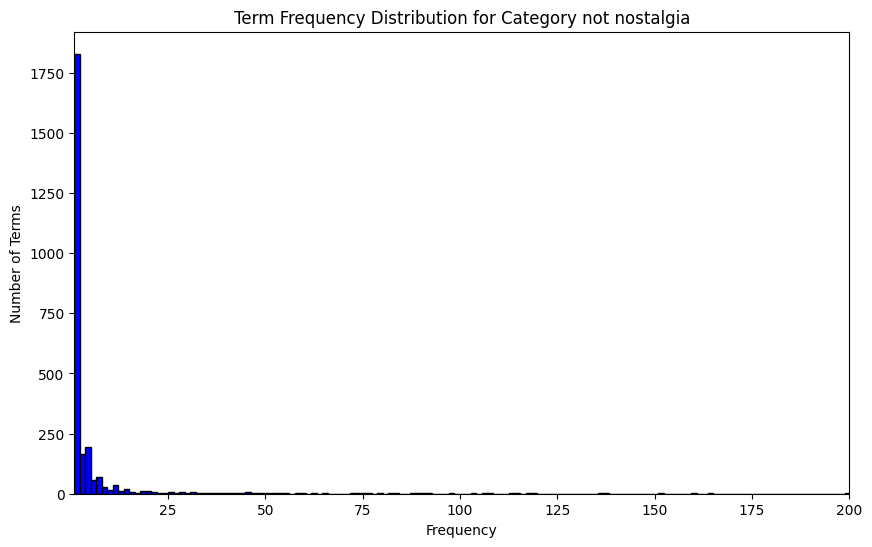

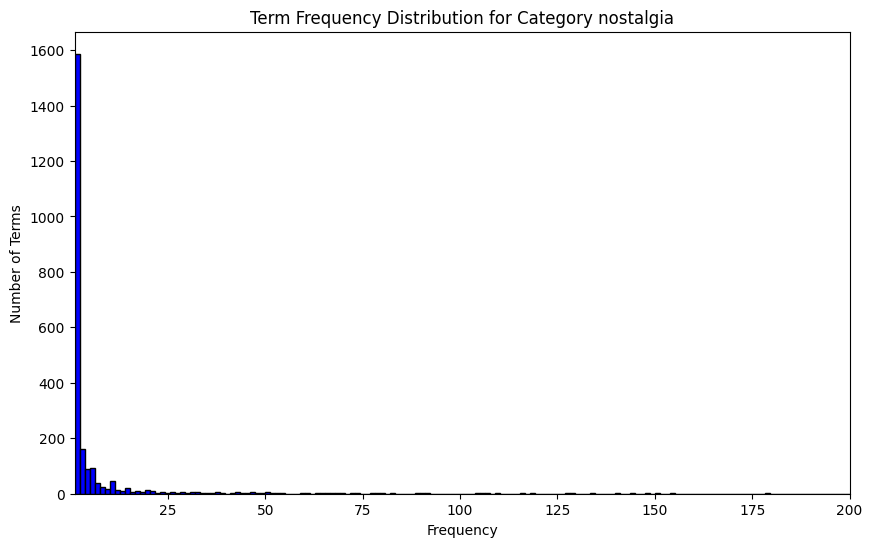

In [43]:
 # Sum over all documents to get total frequency for each word
for category_number in [0, 1]:
    word_counts = term_doc_dfs[categories[category_number]].sum(axis=0).to_numpy()

    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.xlim(1, 200)
    plt.show()

Filtering top 5% and bottom 1%

In [44]:
# remove top 5%
for category_number in [0, 1]:
    word_counts = term_doc_dfs[categories[category_number]].sum(axis=0).to_numpy()

    # Sort the term frequencies in descending order
    sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order
    sorted_indices = np.argsort(sorted_counts) # Get indices of sorted frequencies

    # Calculate the index corresponding to the top 5% most frequent terms
    total_terms = len(sorted_counts)
    top_5_percent_index = int(0.05 * total_terms)

    # Get the indices of the top 5% most frequent terms
    top_5_percent_indices = sorted_indices[:top_5_percent_index]

    # Filter terms that belong to the top 5% based on their rank
    filtered_words = [count_vec.get_feature_names_out()[i] for i in top_5_percent_indices]

    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in top 5%: {top_5_percent_index}")
    print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['purpose', 'prom', 'prolific', 'puts', 'jerk', 'jensen', 'jeez', 'jees', 'jeans', 'japanese', 'japan', 'january', 'jams', 'jamison', 'jamie', 'punk', 'put', 'punishment', 'pull', 'pubs', 'pub', 'ps', 'proud', 'protest', 'protect', 'props', 'proper', 'proof', 'putting', 'quality', 'quando', 'principle', 'precious', 'pray', 'praises', 'princilla', 'princess', 'prime', 'primary', 'priceless', 'previous', 'prevalent', 'pretty', 'pretensions', 'pretend', 'press', 'presley', 'presidents', 'popstars', 'pops', 'pop', 'presenting', 'presented', 'presentation', 'present', 'presence', 'prepare', 'prep', 'preferred', 'prefer', 'predictions', 'predicting', 'predict', 'predating', 'plays', 'playing', 'player', 'praise', 'practice', 'powerful', 'power', 'postings', 'posting', 'posters', 'posted', 'post', 'possibly', 'portland', 'popularity', 'popular', 'pinup', 'pink', 'pin', 'poor', 'poll', 'political', 'police', 'points', 'poin

In [45]:
# remove bottom 1%
for category_number in [0, 1]:

    word_counts = term_doc_dfs[categories[category_number]].sum(axis=0).to_numpy()

    # Sort the term frequencies in ascending order and get sorted indices
    sorted_counts = word_counts[sorted_indices]  # Sort frequencies
    sorted_indices = np.argsort(sorted_counts)  # Get indices of sorted frequencies

    # Calculate the index corresponding to the bottom 1% least frequent terms
    total_terms = len(sorted_counts)
    bottom_1_percent_index = int(0.01 * total_terms)

    # Get the indices of the bottom 1% least frequent terms
    bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

    # Filter terms that belong to the bottom 1% based on their rank
    filtered_words = [count_vec.get_feature_names_out()[i] for i in bottom_1_percent_indices]

    print(f"Category: {categories[category_number]}")
    print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
    print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['name', 'germany', '1960s', '1958', 'george', '1955', '1954', 'genres', '1950s', '1950', '1930', '1927', '07', 'nice', 'genre', '16', '1973', '1970s', '1970', '1968', 'nearest', 'genesis']
Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['15', '11', '10m', '10', 'fear', 'favourites', 'fast', 'fashioned', 'fashionable', 'far', 'fantastic', 'fever', 'female', 'fellows', 'fella', 'feels', 'nana', 'nan', 'names', 'named', 'name', '1963']


I found top 5% terms and bottom 1% terms, now I can filter them out.

In [46]:
def filter_top_bottom_words_by_sum(term_doc_df, top_per = 0.05, bot_per = 0.01):
    word_sums = term_doc_df.sum(axis=0)
    sorted_words = word_sums.sort_values()

    total_words = len(sorted_words)
    top_n = int(top_per * total_words)
    bot_n = int(bot_per * total_words)

    words_remove = pd.concat([sorted_words.head(bot_n), sorted_words.tail(top_n)]).index

    return term_doc_df.drop(columns=words_remove)

In [47]:
category_number = 0

filtered_term_doc_dfs = {}

for category in categories:
    filtered_term_doc_dfs[category] = filter_top_bottom_words_by_sum(term_doc_dfs[category])
term_doc_dfs = filtered_term_doc_dfs

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_doc_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,14,15,150,...,young,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
category_number = 1

filtered_term_doc_dfs = {}

for category in categories:
    filtered_term_doc_dfs[category] = filter_top_bottom_words_by_sum(term_doc_dfs[category])
term_doc_dfs = filtered_term_doc_dfs

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_doc_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category nostalgia:


,07,11,12,13,14,15,16,17,18,19,...,yes,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can use PAMI to help furthur implementation.

In [54]:
from PAMI.extras.DF2DB import DenseFormatDF as db

for category in term_doc_dfs:
    category_safe = category.replace(' ', '_')

    print(category_safe)

    obj = db.DenseFormatDF(term_doc_dfs[category])

    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv',  '>=', 1)

not_nostalgia
nostalgia


Look into the stats and chart of the new-formed transactional database

Database size (total no of transactions) : 695
Number of items : 2031
Minimum Transaction Size : 1
Average Transaction Size : 6.329496402877698
Maximum Transaction Size : 33
Standard Deviation Transaction Size : 5.697600823335502
Variance in Transaction Sizes : 32.50943130222047
Sparsity : 0.9968835566701735


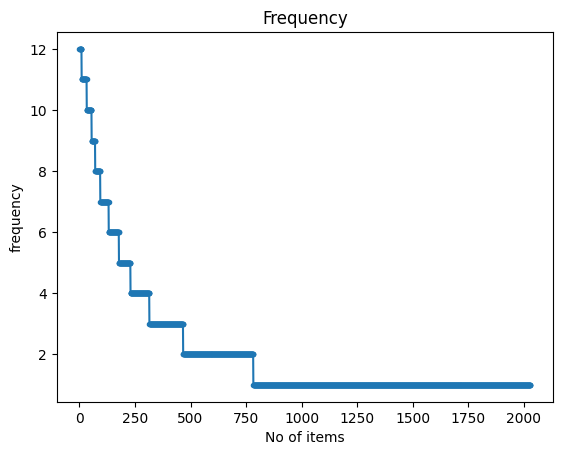

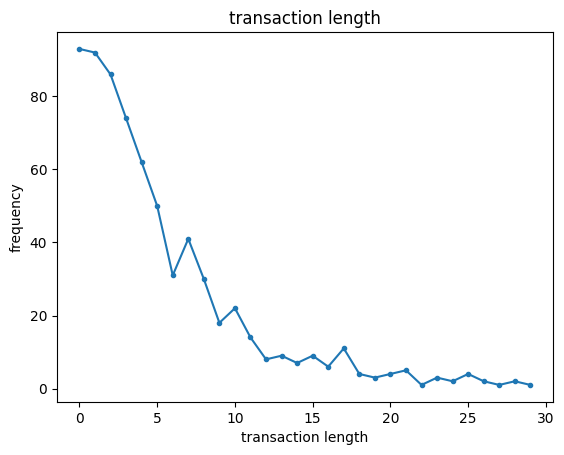

In [55]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 733
Number of items : 2300
Minimum Transaction Size : 1
Average Transaction Size : 6.219645293315144
Maximum Transaction Size : 33
Standard Deviation Transaction Size : 4.824001654383586
Variance in Transaction Sizes : 23.302782934120575
Sparsity : 0.9972958063942108


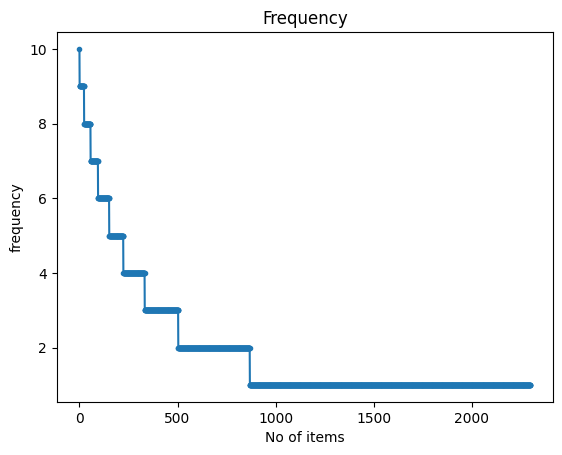

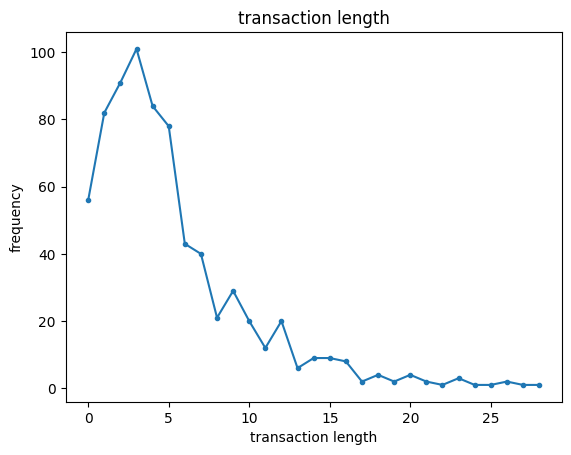

In [56]:
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Use FPGrowth to find patterns

In [61]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia)))

print('Runtime: ' + str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 71
Runtime: 0.011033058166503906


In [62]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
66,70s,12
67,youth,12
68,dancing,12
69,80s,12


In [63]:
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia)))
print('Runtime: ' + str(obj2.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 24
Runtime: 0.0075147151947021484


In [64]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
5,60s,9
6,family,9
7,ones,9
8,things,9
9,pure,9


In [65]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
59       grew       12
67      their       12
66        80s       12
60       your       12
61  fantastic       12
..        ...      ...
84    perfect        9
85         ll        9
86      happy        9
87     almost        9
88        end        9

[89 rows x 2 columns]
Number of patterns discarded: 6


Integtate these new patterns into data

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,wonder,person,sung,year,handsome,perfect,ll,happy,almost,end
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimentionality Reduction

Following is the charts of original data

In [69]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [74]:
print(X_pca_tdm.shape)

(1499, 2)


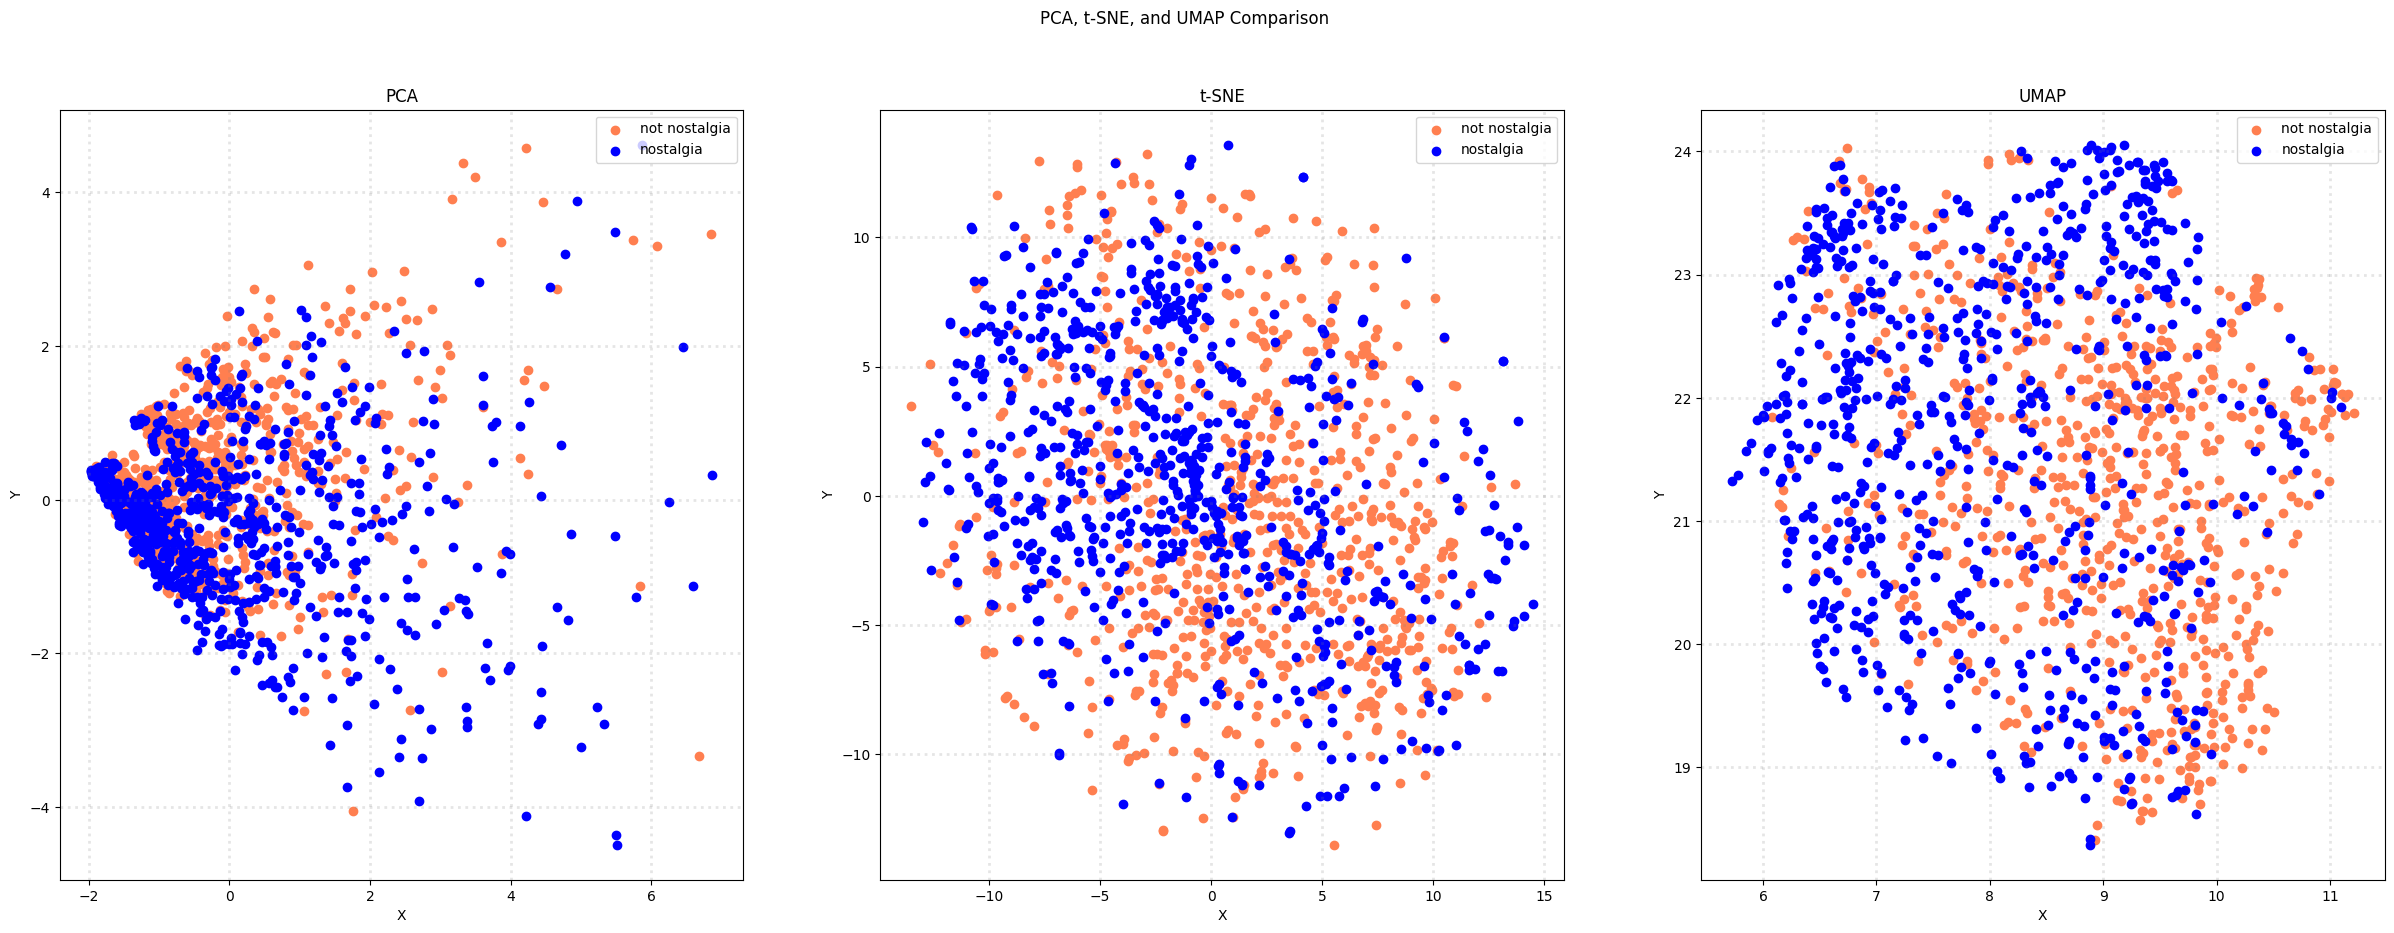

In [71]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

Now, try this method to augmented data.

In [72]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

In [73]:
print(X_pca_aug.shape)
print(X_tsne_aug.shape)

(1499, 2)
(1499, 2)


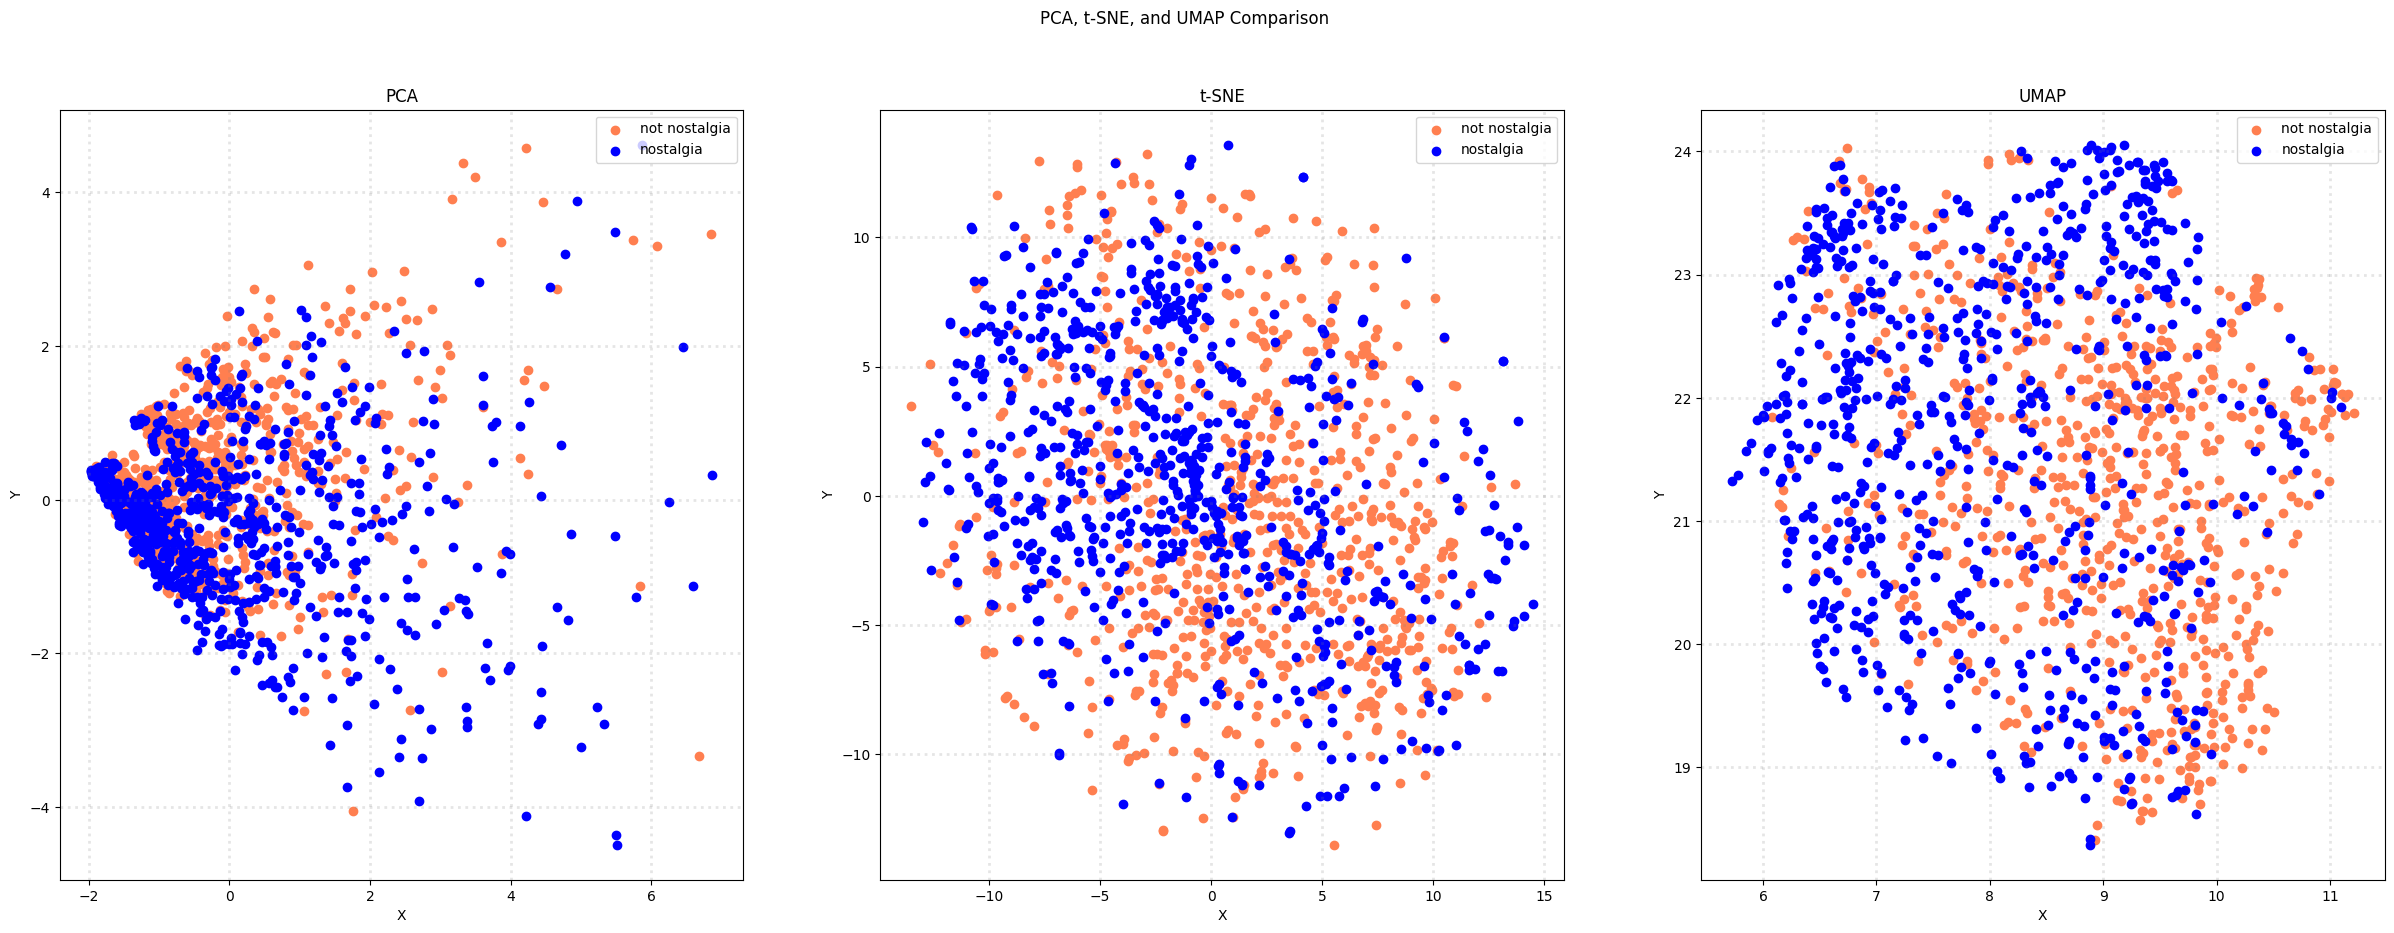

In [75]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

Try 3D plot

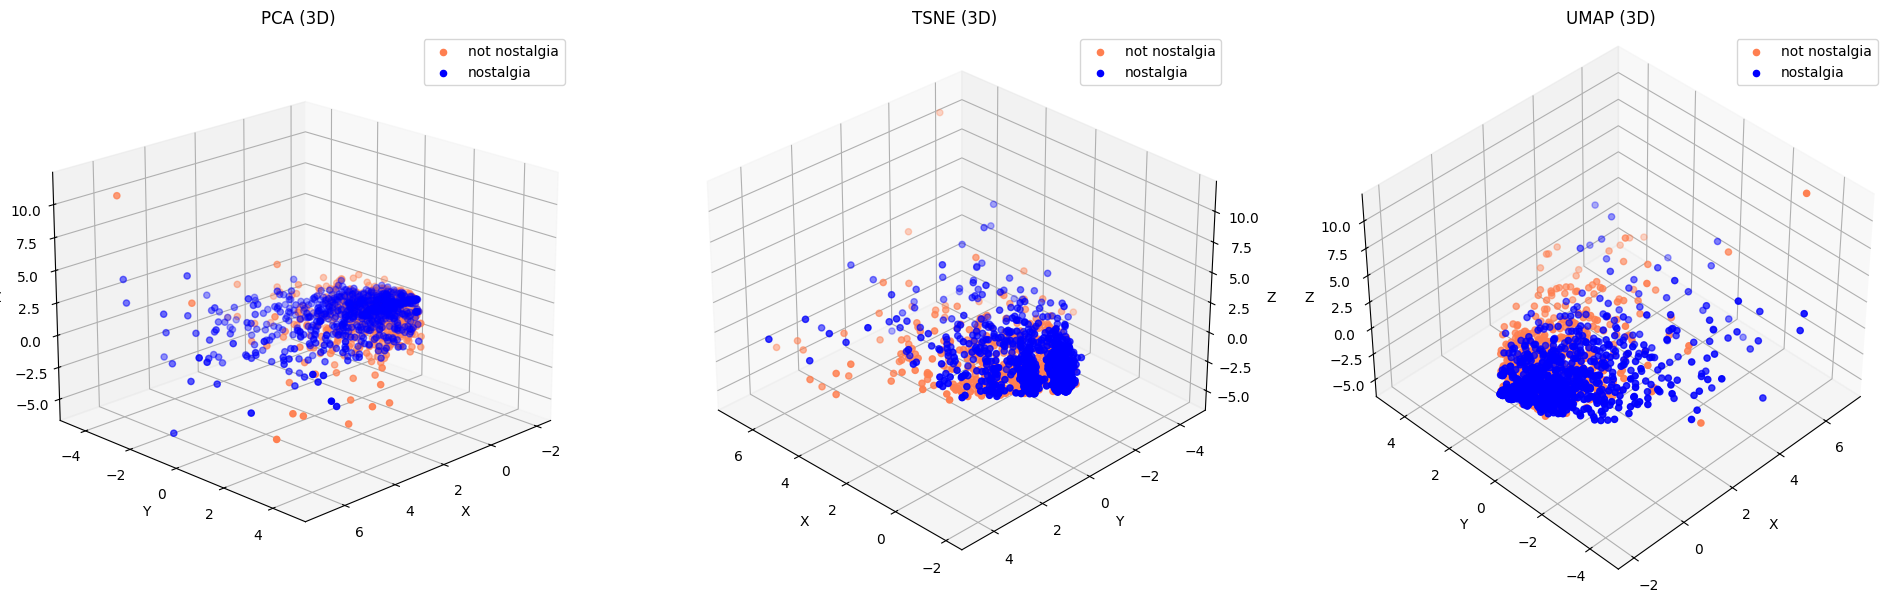

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Reduce to 3D
X_pca_aug_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Create 3D plot
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        zs = X_reduced[X['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc = 'upper right')

# Create 3D subplots (use projection = '3d' to show 3D plots)
fig = plt.figure(figsize=(24, 8))
ax_pca = fig.add_subplot(131, projection='3d', title="PCA (3D)")
ax_tsne = fig.add_subplot(132, projection='3d', title="TSNE (3D)")
ax_umap = fig.add_subplot(133, projection='3d', title="UMAP (3D)")

plot_3d_scatter(ax_pca, X_pca_aug_3, 'PCA (3D)')
plot_3d_scatter(ax_tsne, X_pca_aug_3, 'TSNE (3D)')
plot_3d_scatter(ax_umap, X_pca_aug_3, 'UMAP (3D)')

# Set view angle
ax_pca.view_init(elev=20, azim=45) # elev: 俯仰角; azim: 方位角
ax_tsne.view_init(elev=30, azim=135)  
ax_umap.view_init(elev=40, azim=225) 

plt.show()

### Discretization and Binarization

In [78]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()

mlb.fit(X['sentiment'])

LabelBinarizer()

Turn the category into binary representation

In [79]:
X['bin_category'] = mlb.transform(X['sentiment']).tolist()

X[0:9]

,sentiment,comment,sent_num,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{singer, all, at, Lord, the, now., was, time.,...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{an, was, his, I, ever, listened, beautiful, s...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{how, They, is., at, people, sounds, forgot, t...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{all, the, years, God, is, I, ""marry, came, No...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{songs, me, played, listening, of, who, everyd...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...",1,"[Every, time, I, heard, this, song, as, a, chi...","{it, as, Now, death,, reminded, used, I, fear,...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...",1,"[My, dad, loved, listening, to, Jim, Reeves, ,...","{how, listening, the, 70's, was, it, then,, do...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,1,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{the, tunes, since, his, nostalgic, I, HAVE, n...",[0]
8,not nostalgia,Wherever you are you always in my heart,0,"[Wherever, you, are, you, always, in, my, heart]","{always, Wherever, in, my, are, heart, you}",[1]


### Data Exploration

In [80]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [81]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [82]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [83]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\hans\AppData\Local\Temp\ipykernel_28332\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\hans\AppData\Local\Temp\ipykernel_28332\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\hans\AppData\Local\Temp\ipykernel_28332\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\hans\AppData\Local\Temp\ipykernel_28332\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

### Data Classification

In [85]:
X

,sentiment,comment,sent_num,unigrams,tokenized_text,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,0,"[He, was, a, singer, with, a, golden, voice, t...","{singer, all, at, Lord, the, now., was, time.,...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,1,"[The, mist, beautiful, voice, ever, I, listene...","{an, was, his, I, ever, listened, beautiful, s...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{how, They, is., at, people, sounds, forgot, t...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{all, the, years, God, is, I, ""marry, came, No...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,1,"[listening, to, his, songs, reminds, me, of, m...","{songs, me, played, listening, of, who, everyd...",[0]
...,...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0,"[i, do, n't, know, !, .., but, the, opening, o...","{the, well!...or, as, Richard, video,..seeing,...",[1]
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0,"[it, 's, sad, this, is, such, a, beautiful, so...","{how, such, is, really, beautiful, sad, tell, ...",[1]
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0,"[Dear, Friend, ,, I, think, age, and, time, is...","{it, is, I, glad, comes, Friend,, that, to, so...",[1]
1498,nostalgia,I was born in 1954 and started to be aware of ...,1,"[I, was, born, in, 1954, and, started, to, be,...","{at, the, music, was, captured, it, as, sound,...",[0]


In [86]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sent_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [87]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8222    0.9528    0.8827       233
    nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



Try the dataset with augmented data

In [90]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sent_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

In [91]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,wonder,person,sung,year,handsome,perfect,ll,happy,almost,end
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X_test

,00,000,045,07,10,100,10m,11,11th,12,...,wonder,person,sung,year,handsome,perfect,ll,happy,almost,end
1117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1188,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [93]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.86

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8102    0.9528    0.8757       233
    nostalgia     0.9375    0.7604    0.8397       217

     accuracy                         0.8600       450
    macro avg     0.8739    0.8566    0.8577       450
 weighted avg     0.8716    0.8600    0.8584       450

